In [1]:
import torch 
import torchvision 
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.utils.data import random_split

torch.manual_seed(0)

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = 14, 6

In [2]:
torch.manual_seed(torch.initial_seed())

In [3]:
train_transforms = transforms.Compose([
    transforms.Resize((32, 32)),    
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose(transforms.ToTensor())

In [4]:
data_dir = 'images_tires'

train_dataset = datasets.ImageFolder(data_dir, transform=train_transforms)
test_dataset = datasets.ImageFolder(data_dir, transform=test_transforms)

In [5]:
train_size = int(0.828 * len(train_dataset))
test_size = len(train_dataset) - train_size

train_dataset, test_dataset = random_split(train_dataset, [train_size, test_size])

In [6]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

(np.float64(-0.5), np.float64(165.5), np.float64(165.5), np.float64(-0.5))

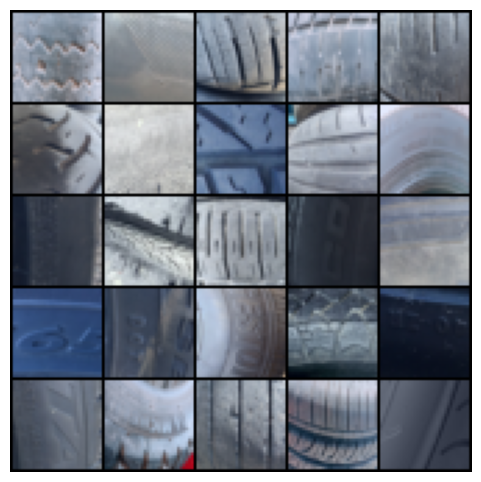

In [7]:
dataiter = iter(train_loader) 
images, labels = next(dataiter) 
plt.imshow(np.transpose(torchvision.utils.make_grid( 
images[:25], normalize=True, padding=1, nrow=5).numpy(), (1, 2, 0))) 
plt.axis('off')

In [8]:
class CNN(torch.nn.Module): 
    def __init__(self): 
        super().__init__() 
        self.model = torch.nn.Sequential( 
            torch.nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1), 
            torch.nn.ReLU(), 
            torch.nn.MaxPool2d(kernel_size=2), 
  
            torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1), 
            torch.nn.ReLU(), 
            torch.nn.MaxPool2d(kernel_size=2), 
              
            torch.nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1), 
            torch.nn.ReLU(), 
            torch.nn.MaxPool2d(kernel_size=2), 
  
            torch.nn.Flatten(), 
            torch.nn.Linear(64*4*4, 512), 
            torch.nn.ReLU(), 
            torch.nn.Linear(512, 2) 
        ) 
  
    def forward(self, x): 
        return self.model(x) 

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Epoch 1/50: Training loss = 0.6557619023323059
Epoch 2/50: Training loss = 0.6240256214141846
Epoch 3/50: Training loss = 0.6326852774620056
Epoch 4/50: Training loss = 0.615598714351654
Epoch 5/50: Training loss = 0.604422812461853
Epoch 6/50: Training loss = 0.5634117013216019
Epoch 7/50: Training loss = 0.5564737951755524
Epoch 8/50: Training loss = 0.5744290816783905
Epoch 9/50: Training loss = 0.5699269771575928
Epoch 10/50: Training loss = 0.5512688148021698
Epoch 11/50: Training loss = 0.5487871289253234
Epoch 12/50: Training loss = 0.5355840863287449
Epoch 13/50: Training loss = 0.5373762321472167
Epoch 14/50: Training loss = 0.5320613551139831
Epoch 15/50: Training loss = 0.5585015952587128
Epoch 16/50: Training loss = 0.5413483130931854
Epoch 17/50: Training loss = 0.5236372184753418
Epoch 18/50: Training loss = 0.5486105978488922
Epoch 19/50: Training loss = 0.5218128502368927
Epoch 20/50: Training loss = 0.5056621617078781
Epoch 21/50: Training loss = 0.5695503175258636
Epo

Text(0, 0.5, 'Training loss')

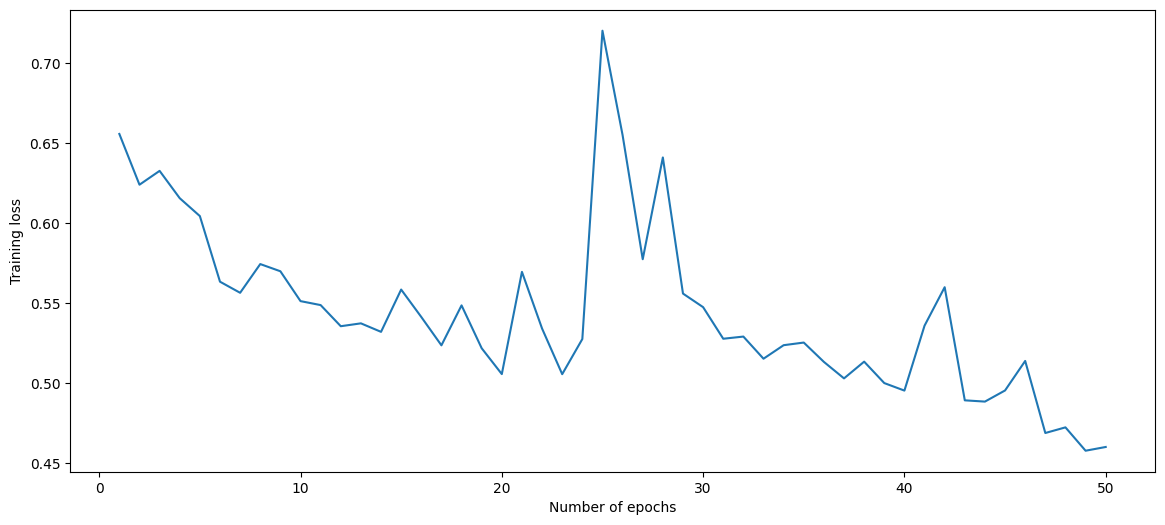

In [11]:
model = CNN().to(device) 
  
num_epochs = 50
learning_rate = 0.001
weight_decay = 0.01
criterion = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay) 
  
train_loss_list = [] 
for epoch in range(num_epochs): 
    print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ') 
    train_loss = 0
      
    model.train() 
    for i, (images, labels) in enumerate(train_loader): 
          
        images = images.to(device) 
        labels = labels.to(device) 
  
        outputs = model(images) 
        loss = criterion(outputs, labels) 
  
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step() 
        train_loss += loss.item() 
      
    train_loss_list.append(train_loss/len(train_loader)) 
    print(f"Training loss = {train_loss_list[-1]}")    
      
plt.plot(range(1,num_epochs+1), train_loss_list) 
plt.xlabel("Number of epochs") 
plt.ylabel("Training loss") 

In [12]:
test_acc=0
model.eval() 

with torch.no_grad(): 
	for i, (images, labels) in enumerate(test_loader): 
		
		images = images.to(device) 
		y_true = labels.to(device) 
		
		outputs = model(images) 
		
		_, y_pred = torch.max(outputs.data, 1) 
		
		test_acc += (y_pred == y_true).sum().item() 
	
	print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")

Test set accuracy = 77.8125 %
